In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
import auxiliarfunctions as af


In [2]:
dataset1 = fetch_openml(data_id=37)

X = dataset1.data
y = dataset1.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

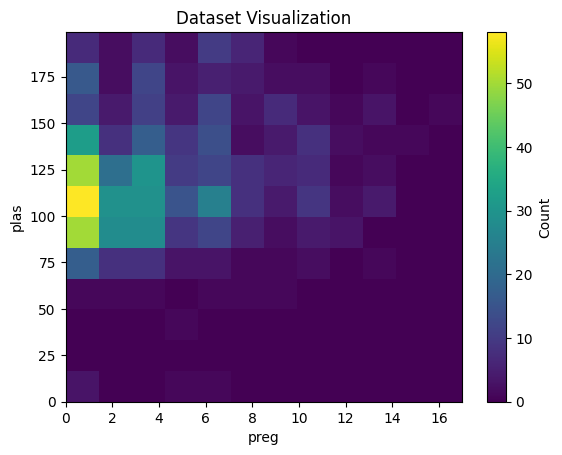

preg      int64
plas      int64
pres      int64
skin      int64
insu      int64
mass    float64
pedi    float64
age       int64
dtype: object
category
66     tested_positive
743    tested_positive
531    tested_negative
350    tested_negative
527    tested_negative
            ...       
396    tested_negative
337    tested_positive
741    tested_negative
311    tested_negative
412    tested_negative
Name: class, Length: 614, dtype: category
Categories (2, object): ['tested_negative', 'tested_positive']
-------------------
preg      int64
plas      int64
pres      int64
skin      int64
insu      int64
mass    float64
pedi    float64
age       int64
dtype: object
category
     preg  plas  pres  skin  insu  mass   pedi  age
66      0   109    88    30     0  32.5  0.855   38
743     9   140    94     0     0  32.7  0.734   45
531     0   107    76     0     0  45.3  0.686   24
350     4    92    80     0     0  42.2  0.237   29
527     3   116    74    15   105  26.3  0.107   24
..    ..

In [3]:
af.draw_data(X, y, 0, 1)

X_train_processed, y_train_numeric = af.preprocess_data(X_train, y_train)
X_test_processed, y_test_numeric = af.preprocess_data(X_test, y_test)

print(X_train.dtypes)
print(y_train.dtypes)
print(y_train)
print("-------------------")
print(X_train_processed.dtypes)
print(y_train_numeric.dtypes)
print(X_train_processed)
print(y_train_numeric)




In [4]:
knn = neighbors.KNeighborsClassifier()

In [5]:
def classify(model, X, y, X_test, y_test):
    model.fit(X, y)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

In [6]:
classify(knn, X_train_processed, y_train_numeric, X_test_processed, y_test_numeric)

Accuracy: 0.6818181818181818


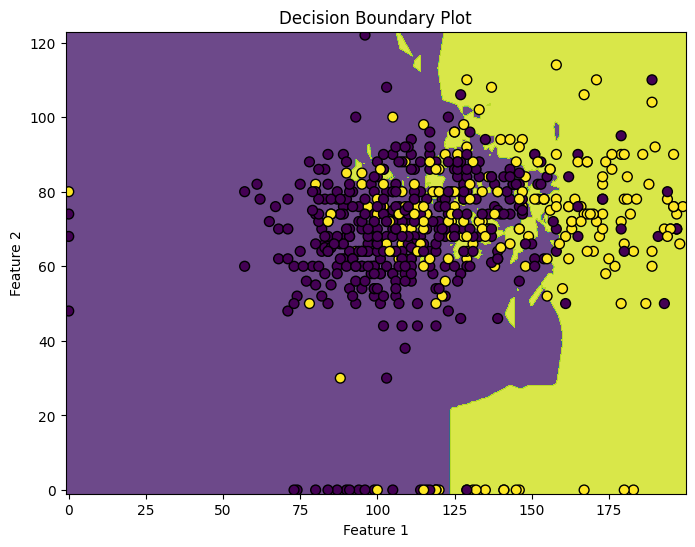

In [7]:
af.decision_plot_function(X_train_processed, y_train_numeric, knn, 1, 2)

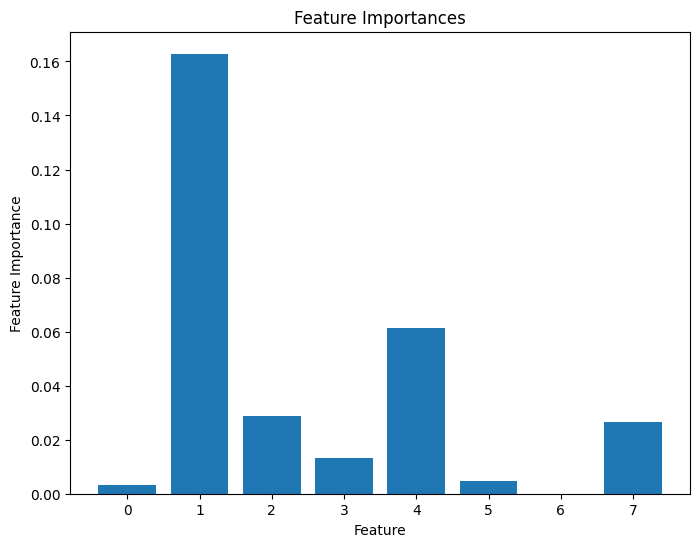

In [8]:
af.features_importance_plot(knn,X_train_processed,y_train_numeric)